<a href="https://colab.research.google.com/github/ttevhide/Programming-for-Data/blob/main/15_2_Decision_Tree_coded_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding a simple decision tree
---

In this worksheet we are going to work with a data set, using the idea of a decision tree class.  We are going to simplify the model and use Python code to make a simple decision tree classification model.  We will do this for two reasons:
*   writing the code is often good for helping to understand what is going on under the bonnet of a library function
*   it is a good coding exercise for practice as it mostly depends on calculations and if..elif..else statements

In this worksheet we are going to code a decision tree which will use the calculated probabilities to make decisions about whether a row of given data would be classified as Iris-virginica, or not, based on sepal and petal dimensions.  It is easier to classify between two values (Iris-virginica or not).  Later, using this information, species would be further predicted by probabilities of error.

![Iris-petals and sepals](https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg)

The workflow is:
*  divide the data set into 70% of the rows for training and 30% for testing  (we can increase the size of the training set later)
*  find the mean for each of the 4 size columns
*  calculate the proportion of each column that are on or above mean that are of a species (ie proportion of petal-lengths on or above mean that are Iris-virginica)
*  infer the proportion of each that are not of that species (using 1 - proportion above).  In both cases we are looking to find if either of these is 1, which could be infered as definitely not that species. 
*  calculate a Gini Index that will indicate the probability that a prediction will be incorrect
*  use the results of the Gini Index to model a decision tree
*  code the decision tree model into a function that will return whether or not a row in the test set is predicted to be of species Iris-virginica
*  use the decision tree function to predict, for each row in the test set, if the species will be Iris-virginicia or not, using a set of nested if statements to classify
*  compare the predicted values against the actual values in the test set - what proportion were predicted correctly?


### Exercise 1 - investigate the iris data set
---
Let's start by looking at the data.  We are going to use a data set that contains data on iris flowers.

Read the data at this location: https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv into a dataframe called iris_data

The columns in the CSV file do not have headings, when you read the file, add column headings like this:
```
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, name=names)
```
*  Take a look at the column info (how many columns, what type of data, any missing data?)
*  Take a look at the data values in the first 10 and the last 10 records to get an idea of the type of values included
*  Find out how many unique values there are in the species column
*  Find out the maximum, minimum, mean, median and upper and lower quartile values in each of the columns


In [9]:
import pandas as pd
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, names=names)
iris_data.info()
display(iris_data.head(10))
print("")
display(iris_data.tail(10))
print("")
display(iris_data.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


,sepal-length,sepal-width,petal-length,petal-width,species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
#unique values in the species column
iris_data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Exercise 2 - split the data into train and test sets
---

Split the data set into and 70% train, 30% test, split.  From now, just use the train data set.


In [12]:
# import the train_test_split function
from sklearn.model_selection import train_test_split

# create the classification variables from the all columns
train, test = train_test_split(iris_data, test_size=0.30)
train.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,105.000000,105.000000,105.000000,105.000000
mean,5.796190,3.049524,3.654286,1.150476
std,0.860783,0.409532,1.790521,0.761340
min,4.300000,2.200000,1.100000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.700000,3.000000,4.200000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.100000,6.900000,2.500000


### Exercise 3 - assumptions and classification
---

Let's make some assumptions based on the data

1.  Iris-setosa, Iris-versicolor, Iris-virginica are the full range of types of iris to be analysed
2.  Although this is a small data set, the means are fairly representative

With these in mind, let's start by classifying sepal/petal size into long/short and wide/narrow with values on or above the mean taken as long or wide and those below as short or narrow.

This is a starting point.  We will be trying to find a value (indicator) for each column where rows on or above do not contain any of a particular species, this might indicate that this column is a good (if not rough) indicator of species.  For now, the indicator is the mean.

*  Drop any null values from each column

Calculate, and store the means of the four columns

*  **Test**:
Display train.describe() to see the value of the means of the training set. Print the four means and compare to the output of train.describe() to check that they have been calculated correctly.

*  Create a new dataframe with the numeric columns encoded so show a 1 for any value that is above the mean for its column and 0 for any that isn't.




In [17]:
# get the mean for each column and apply a function to encode into 1 (above mean) and 0 (mean or below mean)

sepal_length_mean=train['sepal-length'].mean()
sepal_width_mean=train['sepal-width'].mean()
petal_length_mean=train['petal-length'].mean()
petal_width_mean=train['petal-width'].mean()

print(sepal_length_mean, sepal_width_mean, petal_length_mean, petal_width_mean)

display(train.describe())
# run the function for each column so that each of the four columns are encoded, then drop the original columns, saving as a new dataframe
#train['sepal-length'] = train.apply(encode, axis=1, key='sepal-length', indicator=train['sepal-length'].mean())


5.796190476190474 3.0495238095238095 3.654285714285715 1.15047619047619


,sepal-length,sepal-width,petal-length,petal-width
count,105.000000,105.000000,105.000000,105.000000
mean,5.796190,3.049524,3.654286,1.150476
std,0.860783,0.409532,1.790521,0.761340
min,4.300000,2.200000,1.100000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.700000,3.000000,4.200000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.100000,6.900000,2.500000


In [20]:
def iris_encoder(train_encoded, **kwds):
  mean=kwds['indicator']
  key=kwds['key']

  if train_encoded[key]>= mean:
    return 1
  else:
    return 0

train_encoded=pd.DataFrame(train)

train_encoded["above_sl"]=train_encoded.apply(iris_encoder, axis=1, key='sepal-length', indicator=sepal_length_mean)
train_encoded["above_sw"]=train_encoded.apply(iris_encoder, axis=1, key='sepal-width', indicator=sepal_width_mean)
train_encoded["above_pl"]=train_encoded.apply(iris_encoder, axis=1, key='petal-length', indicator=petal_length_mean)
train_encoded["above_pw"]=train_encoded.apply(iris_encoder, axis=1, key='petal-width', indicator=petal_width_mean)

train_encoded.head()

,sepal-length,sepal-width,petal-length,petal-width,species,above_sl,above_sw,above_pl,above_pw
8,4.4,2.9,1.4,0.2,Iris-setosa,0,0,0,0
16,5.4,3.9,1.3,0.4,Iris-setosa,0,1,0,0
7,5.0,3.4,1.5,0.2,Iris-setosa,0,1,0,0
49,5.0,3.3,1.4,0.2,Iris-setosa,0,1,0,0
130,7.4,2.8,6.1,1.9,Iris-virginica,1,0,1,1


### Exercise 4 - Calculate the proportion of values on or above the mean that are of each species

We are going to focus on the `Iris-virginica` species first.

First we will calculate, for each dimension column (`sepal-length, sepal-width, petal-length, petal-width`) what proportion of values in that column, where the value is on or above the mean, are classified as `Iris-virginica`.

We will do this by filtering all the records in each column of the the `train` set that are on or above the mean and match the species .  Then use the outcome to calculate the proportion of the full `train` set for which a value on or above the mean that are of species `Iris-virginica`.

*  filter for values in the `sepal-length` column being on or above the mean and the species column being `Iris-virginica`.  Then divide the count of rows in this filtered dataset by the count of rows in a second data set, filtered for just the value being on or above the mean.

*  Do this for all four columns, for `Iris-virginica`  (4 operations).

Print the results to see which columns look like they might most reliably predict the species as `Iris-virginica` (the result is as close as possible to 1).  The highest numbers may indicate the most reliable indicators, but we will do some more before coming to this conclusion.

*  By definition, those on or above the mean that are NOT Iris_virginica will be `1 - the proportion of those that are.  Calculate these

The first one has been done for you.

*  We will also need the proportion of those BELOW the mean that are NOT Iris-virginica.  Calculate these in the same way



In [56]:
# Boolean index for "Iris-virginica":
iris_virginica = train_encoded['species'] == 'Iris-virginica'

# calculate the proportion of results where the value is on or above mean that are of the species Iris-virginica

train_virginica_total = len(train_encoded[iris_virginica])

#Totals with values above mean

virginica_sl_total = len(train_encoded[(iris_virginica) & (train_encoded['above_sl']==1)])
virginica_sw_total = len(train_encoded[(iris_virginica) & (train_encoded['above_sw']==1)])
virginica_pl_total = len(train_encoded[(iris_virginica) & (train_encoded['above_pl']==1)])
virginica_pw_total = len(train_encoded[(iris_virginica) & (train_encoded['above_pl']==1)])

#Proportions for virginica
proportion_virginica_sl = virginica_sl_total/train_virginica_total
proportion_virginica_sw = virginica_sw_total/train_virginica_total
proportion_virginica_pl = virginica_pl_total/train_virginica_total
proportion_virginica_pw = virginica_pw_total/train_virginica_total

print("Total Virginica: " , train_virginica_total)
print(f"Total Virginica sepal length above mean: {virginica_sl_total} proportion: {proportion_virginica_sl}")  
print(f"Total Virginica sepal width above mean: {virginica_sw_total} proportion: {proportion_virginica_sw}")
print(f"Total Virginica petal length above mean: {virginica_pl_total} proportion: {proportion_virginica_pl}")
print(f"Total Virginica petal width above mean: {virginica_pw_total} proportion: {proportion_virginica_pw}")


Total Virginica:  34
Total Virginica sepal length above mean: 31 proportion: 0.9117647058823529
Total Virginica sepal width above mean: 9 proportion: 0.2647058823529412
Total Virginica petal length above mean: 34 proportion: 1.0
Total Virginica petal width above mean: 34 proportion: 1.0


sepal length, petal length and petal width and  can be used to decide


### Exercise 5 - Calculate the proportion of each column, where the value is below mean, that are of species `Iris-virginica`

Repeat the code above, this time looking for values below the mean

In [57]:
# calculate the proportion of results where the value is below mean that are of the species Iris-virginica

not_virginica_sl = 1-proportion_virginica_sl
not_virginica_sw = 1-proportion_virginica_sw
not_virginica_pl = 1-proportion_virginica_pl
not_virginica_pw = 1-proportion_virginica_pw

print("Proportion of Virginica sepal length below mean: ", not_virginica_sl)  
print("Proportion of Virginica sepal width below mean: ", not_virginica_sw)  
print("Proportion of Virginica petal length below mean: ", not_virginica_pl)  
print("Proportion of Virginica petal width below mean: ", not_virginica_pw)  


Proportion of Virginica sepal length below mean:  0.08823529411764708
Proportion of Virginica sepal width below mean:  0.7352941176470589
Proportion of Virginica petal length below mean:  0.0
Proportion of Virginica petal width below mean:  0.0


### Exercise 5 - calculate for the other two Iris species
---

Do the same calculations for the Iris-versicolor species, then for the Iris-setosa species.






Calculations for **Iris-versicolor**

In [58]:
# Boolean index for "Iris-versicolor":
iris_versicolor = train_encoded['species']=='Iris-versicolor'

train_versicolor_total = len(train_encoded[iris_versicolor])

#Totals with values above mean

versicolor_sl_total = len(train_encoded[(iris_versicolor) & (train_encoded['above_sl']==1)])
versicolor_sw_total = len(train_encoded[(iris_versicolor) & (train_encoded['above_sw']==1)])
versicolor_pl_total = len(train_encoded[(iris_versicolor) & (train_encoded['above_pl']==1)])
versicolor_pw_total = len(train_encoded[(iris_versicolor) & (train_encoded['above_pl']==1)])

#Proportions for virginica
proportion_versicolor_sl=versicolor_sl_total/train_versicolor_total
proportion_versicolor_sw=versicolor_sw_total/train_versicolor_total
proportion_versicolor_pl=versicolor_pl_total/train_versicolor_total
proportion_versicolor_pw=versicolor_pw_total/train_versicolor_total

not_versicolor_sl=1-proportion_versicolor_sl
not_versicolor_sw=1-proportion_versicolor_sw
not_versicolor_pl=1-proportion_versicolor_pl
not_versicolor_pw=1-proportion_versicolor_pw


print("Total Versicolor: " , train_versicolor_total)
print(f"Total Versicolor sepal length above mean: {versicolor_sl_total} proportion: {proportion_versicolor_sl}")  
print(f"Total Versicolor sepal width above mean: {versicolor_sw_total} proportion: {proportion_versicolor_sw}")
print(f"Total Versicolor petal length above mean: {versicolor_pl_total} proportion: {proportion_versicolor_pl}")
print(f"Total Versicolor petal width above mean: {versicolor_pw_total} proportion: {proportion_versicolor_pw}")
print("")
print("Proportion of Versicolor sepal length below mean: ", not_versicolor_sl)  
print("Proportion of Versicolor sepal width below mean: ", not_versicolor_sw)  
print("Proportion of Versicolor petal length below mean: ", not_versicolor_pl)  
print("Proportion of Versicolor petal width below mean: ", not_versicolor_pw) 


Total Versicolor:  33
Total Versicolor sepal length above mean: 18 proportion: 0.5454545454545454
Total Versicolor sepal width above mean: 6 proportion: 0.18181818181818182
Total Versicolor petal length above mean: 30 proportion: 0.9090909090909091
Total Versicolor petal width above mean: 30 proportion: 0.9090909090909091

Proportion of Versicolor sepal length below mean:  0.4545454545454546
Proportion of Versicolor sepal width below mean:  0.8181818181818181
Proportion of Versicolor petal length below mean:  0.09090909090909094
Proportion of Versicolor petal width below mean:  0.09090909090909094


Calculations for **Iris-setosa**

In [59]:
# Boolean index for "Iris-setosa":
iris_setosa = train_encoded['species']=='Iris-setosa'

train_setosa_total = len(train_encoded[iris_setosa])

#Totals with values above mean

setosa_sl_total = len(train_encoded[(iris_setosa )& (train_encoded['above_sl']==1)])
setosa_sw_total = len(train_encoded[(iris_setosa )& (train_encoded['above_sw']==1)])
setosa_pl_total = len(train_encoded[(iris_setosa )& (train_encoded['above_pl']==1)])
setosa_pw_total = len(train_encoded[(iris_setosa )& (train_encoded['above_pl']==1)])

#Proportions for virginica
proportion_setosa_sl=versicolor_sl_total/train_setosa_total
proportion_setosa_sw=versicolor_sw_total/train_setosa_total
proportion_setosa_pl=versicolor_pl_total/train_setosa_total
proportion_setosa_pw=versicolor_pw_total/train_setosa_total

not_setosa_sl=1-proportion_setosa_sl
not_setosa_sw=1-proportion_setosa_sw
not_setosa_pl=1-proportion_setosa_pl
not_setosa_pw=1-proportion_setosa_pw


print("Total setosa: " , train_setosa_total)
print(f"Total setosa sepal length above mean: {setosa_sl_total} proportion: {proportion_setosa_sl}")  
print(f"Total setosa sepal width above mean: {setosa_sw_total} proportion: {proportion_setosa_sw}")
print(f"Total setosa petal length above mean: {setosa_pl_total} proportion: {proportion_setosa_pl}")
print(f"Total setosa petal width above mean: {setosa_pw_total} proportion: {proportion_setosa_pw}")
print("")
print("Proportion of setosa sepal length below mean: ", not_setosa_sl)  
print("Proportion of setosa sepal width below mean: ", not_setosa_sw)  
print("Proportion of setosa petal length below mean: ", not_setosa_pl)  
print("Proportion of setosa petal width below mean: ", not_setosa_pw) 

Total setosa:  38
Total setosa sepal length above mean: 1 proportion: 0.47368421052631576
Total setosa sepal width above mean: 31 proportion: 0.15789473684210525
Total setosa petal length above mean: 0 proportion: 0.7894736842105263
Total setosa petal width above mean: 0 proportion: 0.7894736842105263

Proportion of setosa sepal length below mean:  0.5263157894736843
Proportion of setosa sepal width below mean:  0.8421052631578947
Proportion of setosa petal length below mean:  0.21052631578947367
Proportion of setosa petal width below mean:  0.21052631578947367


### Exercise 6 - predict from the results
---

Create a list of dictionaries from the results Exercise 4 and 5 (e.g. {'species':..., 'above_mean': 0.xx, 'below_mean': 0.xx}  

Then use a loop to go through the list and print:  
*  any species and indicator (above or below mean) that can reliably be predicted.  A reliable prediction may be one over 0.5

In [62]:
# show which columns are reliable predictors

iris_dict={'species': ["iris_virginica",'iris_versicolor', 'iris_setosa'],
           'above_sl': ["0.91", '0.55', '0.47'],
           'above_sw': ["0.26", '0.18', '0.16'],
           'above_pl': ["1", '0.91', '079'],
           'above_pw': ["1", '0.91', '0.78'], 
           'below_sl': ["0.09", '0.45', '0.53'],
           'below_sw': ["0.74", '0.82', '0.84'],
           'below_pl': ["0.0", '0.09', '0.21'],
           'below_pw': ["0.0", '0.09', '0.22'],
           }

iris_info = pd.DataFrame(iris_dict)
iris_info



,species,above_sl,above_sw,above_pl,above_pw,below_sl,below_sw,below_pl,below_pw
0,iris_virginica,0.91,0.26,1,1,0.09,0.74,0.0,0.0
1,iris_versicolor,0.55,0.18,0.91,0.91,0.45,0.82,0.09,0.09
2,iris_setosa,0.47,0.16,079,0.78,0.53,0.84,0.21,0.22


### Exercise 6 - Make a decision tree
---

Use pencil and paper or a graphical application to create a decision tree for Iris-virginica, using the following rules (use the picture below as a guide):

*  The column with the highest indicator is placed at the top
*  Other columns are placed in order below
*  The rest of the columns are placed in order below these

Any column where one branch (on or above mean OR below mean) has an indicator of 0, could be classified as a strong indicator of Iris_virginica being the species.  Anything else, unless there is something very close to 0, could be classified as a weak indicator of Iris_virginica being the species.

Let's code the decision tree using the following logic for this decision tree (yours might be slightly different):

![Decision tree](https://drive.google.com/uc?id=1CTo23EHwR2IPCRjcfSyCQsT_oQ5Exwso)

In the decision tree above, there is no certainty below petal-length so our decision tree will only include petal-width and petal-length.




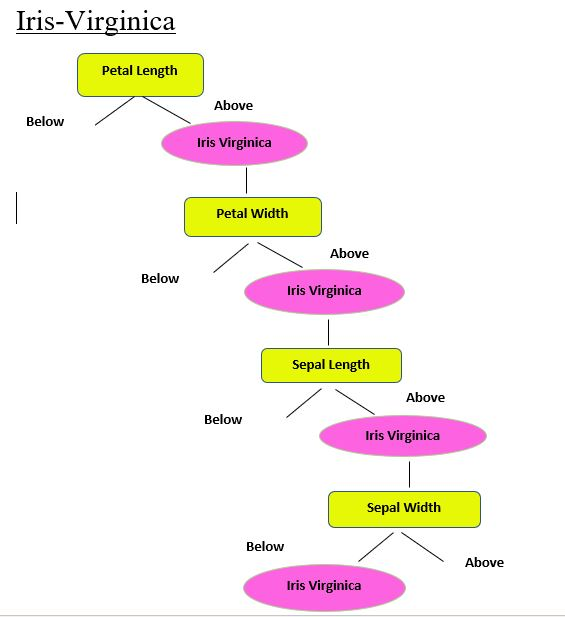

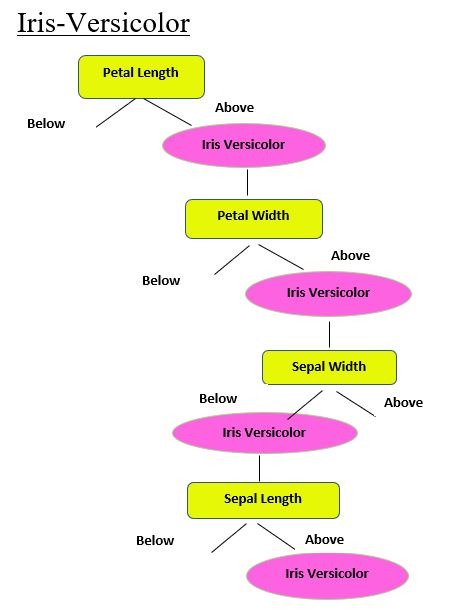

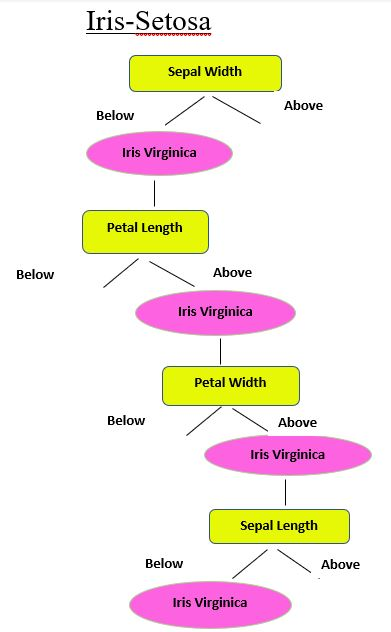

In [78]:
def get_species(df):

  # ADD CODE HERE TO RETURN None if petal-width is below mean (encoded as 0) or if petal-length is below mean (encoded as 0), otherwise return 'Iris-virginia'
  if df['petal-width'] > petal_width_mean:
      if df['petal-length'] > petal_length_mean:
        if df['sepal-length'] > sepal_length_mean:
          return "Iris-virginica"
        else:
          return None


# use the get_species(df) function to predict the species, count how many are predicted correct and use this to calculate the proportion correct
correct = 0
test_size = test.shape[0]
for i in range(0, test_size):
  species = get_species(test.iloc[i])
  if species == test.iloc[i]['species']:
      correct += 1

print ("Proportion correctly identified", correct / test_size) 


Proportion correctly identified 0.35555555555555557


In [71]:
def get_species(df):

  # ADD CODE HERE TO RETURN None if petal-width is below mean (encoded as 0) or if petal-length is below mean (encoded as 0), otherwise return 'Iris-virginia'
  if df['sepal-width'] < sepal_width_mean:
        if df['petal-length'] > petal_length_mean:
          return "Iris-versicolor"
        else:
          return None

# use the get_species(df) function to predict the species, count how many are predicted correct and use this to calculate the proportion correct
correct = 0
test_size = test.shape[0]
for i in range(0, test_size):
  species = get_species(test.iloc[i])
  if species == test.iloc[i]['species']:
      correct += 1

print ("Proportion correctly identified", correct / test_size) 

Proportion correctly identified 0.26666666666666666


In [74]:
def get_species(df):

  # ADD CODE HERE TO RETURN None if petal-width is below mean (encoded as 0) or if petal-length is below mean (encoded as 0), otherwise return 'Iris-virginia'
  if df['sepal-length'] < sepal_length_mean:
    return "Iris-setosa"
  else:
    return None

# sepal_length_mean=train['sepal-length'].mean()
# sepal_width_mean=train['sepal-width'].mean()
# petal_length_mean=train['petal-length'].mean()
# petal_width_mean=train['petal-width'].mean()



# use the get_species(df) function to predict the species, count how many are predicted correct and use this to calculate the proportion correct
correct = 0
test_size = test.shape[0]
for i in range(0, test_size):
  species = get_species(test.iloc[i])
  if species == test.iloc[i]['species']:
      correct += 1

print ("Proportion correctly identified", correct / test_size) 

Proportion correctly identified 0.26666666666666666


### Exercise 7 - change the measure

We are currently using the mean to act as the decision making line.  We can use the decision tree with a different line.

Change the mean values so that you are instead using the median instead for all four columns.  The code should not need changing except for where you calculated the mean.

Run all the code again.  Is the proportion of correct values better this time?   Is the decision tree still appropriate?


What do you notice? (write your answer here)

### Exercise 8 - try different measures
---

Do the same again but with upper quantile, then again with the lower quantile.  Is it making any difference?  Which give the best looking results?

### Exercise 9 - try a different species

Run the mean test again for the Iris-versicolor species.  Again, try some different decision making lines.

What are the results.  Record them in the text cell below:

Write your answers here:  

# New logic introduced in this worksheet:

1.  Adding headings to a CSV if none currently exist
2.  Splitting a data set into train and test sets

In [ ]:
## this type of plot will show the distribution on a chart
from plotnine import *
ggplot(train, aes(x='petal-length', y='petal-width', color='species')) + geom_point() + geom_vline(train, aes(xintercept=train['petal-length'].mean(), color='species')) + geom_hline(train, aes(yintercept=train['petal-width'].mean(), color='species'))